<a href="https://colab.research.google.com/github/cristiank1038/predicciones-ventas-alimenticias/blob/main/Actividad_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd       

In [3]:
filename = '/content/drive/MyDrive/Codificación de Dojo-DS/semana 1 python para la ciencia de datos (NumPy)/sales_predictions.csv'
df = pd.read_csv(filename)  #“df” (que significa “dataframe” o marco de datos)

¿Qué necesitan para limpiar estos datos? ¡Límpienlos!  
Asegúrense de abordar cada una de las siguientes tareas:

Subir archivos y montar Google Drive

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 1) ¿Cuántas filas y columnas?

In [5]:
# mostramos cuantas filas y cuantas columnas tenemos
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 2) ¿Cuáles son los tipos de datos en cada variable?

In [7]:
# Verifica los tipos de datos de la columna usando el atributo dtypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## 3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [8]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [9]:
# Count the duplicates
df.duplicated().sum()

0

## 4) Identifiquen los valores faltantes.

In [10]:
df.isna()  #True significa que los datos en esa celda eran NaN y False significa que no.
# df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).**

In [12]:
"""vamos a eliminar la columna de Outlet_Size, ya que esta me da medida de pedido en terminos muy generales, com grande, mediano y pequeño y 
vamos a dejar la columna de Item_Weight  por que esta me da la informacion mas exacta en cuanto al peso del articulo"""

df.drop(columns='Outlet_Size', inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
""" con la columna faltante llamada Item_Weight lo que hacemos es llenar esos datos faltantes con la media de esas medidas"""
median_Weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_Weight, inplace=True)

# **6) Confirmen que no hay valores faltantes después de abordarlos.**

In [14]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### *7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) *

In [15]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [16]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
# Standardize the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    2889
LF          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [18]:
# Standardize the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [19]:
# Standardize the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### **8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)**

In [20]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [21]:
 df.describe()   

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
df['Item_Weight'].min()

4.555

In [23]:
df['Item_Weight'].max()

21.35

In [24]:
df['Item_Weight'].mean()

12.81341957057374

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

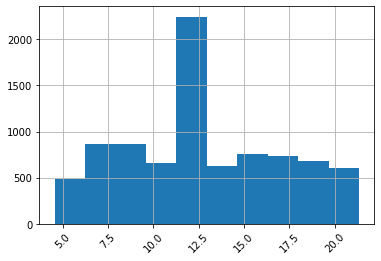

In [26]:
"""Un histograma es un resumen de la variación en una variable medida. Muestra el número de ejemplos que ocurren en una categoría. Un histograma es un tipo de distribución de frecuencia."""
df['Item_Weight'].hist()
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

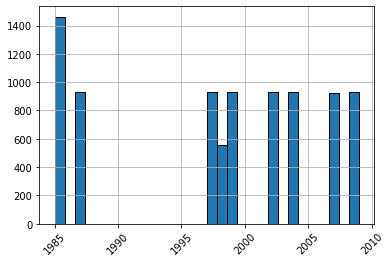

In [27]:
"""grafico histograma"""
oulet_filter = df.loc[:, 'Outlet_Establishment_Year'] <= 2020
df.loc[oulet_filter, 'Outlet_Establishment_Year'].hist(bins = 30,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

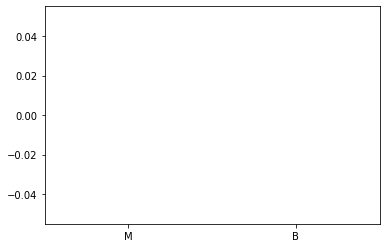

In [39]:
"""Uso de boxplots en Matplotlib"""


# malignant = df.loc[df['Outlet_Establishment_Year']=='M','Item_Outlet_Sales'].values
# benign = df.loc[df['Outlet_Establishment_Year']=='B','Item_Outlet_Sales'].values
# plt.boxplot([malignant,benign], labels=['M', 'B']);


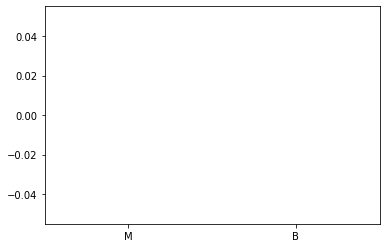

In [47]:
malignant = df.loc[df['Outlet_Establishment_Year']=='M','Item_Outlet_Sales'].values
benign = df.loc[df['Outlet_Establishment_Year']=='B','Item_Outlet_Sales'].values
plt.boxplot([malignant,benign], labels=['M', 'B']);

Uso de boxplots en Pandas

Se puede usar Pandas como un envoltorio alrededor de Matplotlib. Una razón por la que usar Pandas es que requiere menos códigos.

Vamos a crear un boxplot para mostrar cuánto menos sintaxis se necesita para crear un trazado con Pandas frente un Matplotlib limpio.

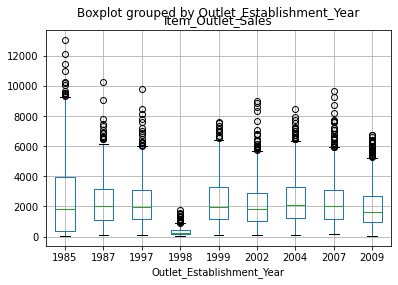

In [44]:
# Deshacerse de Item_Outlet_Sales
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Establishment_Year');

A veces encontrarán útil usar la sintaxis de Matplotlib para ajustar el resultado final del trazado. El código de abajo elimina el subtítulo y título usando una sintaxis limpia de Matplotlib.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


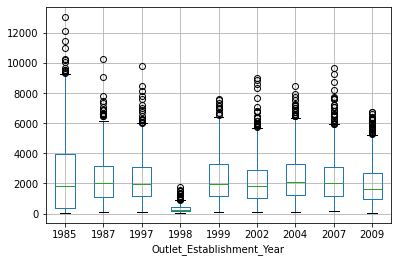

In [49]:
# Same plot but without the area_mean subtitle and title
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Establishment_Year');
plt.title('');
plt.suptitle('');

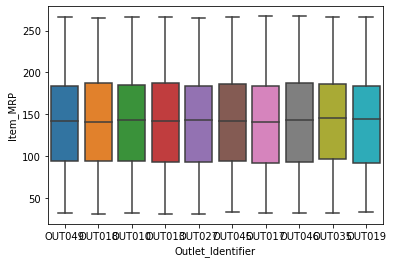

In [65]:
sns.boxplot(x='Outlet_Identifier', y='Item_MRP', data=df)

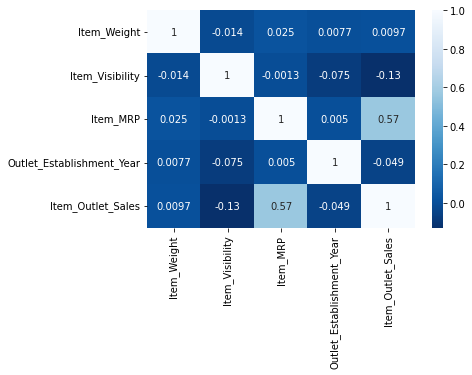

In [30]:
"""correlacion y mapas de calor"""
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues_r', annot = True)




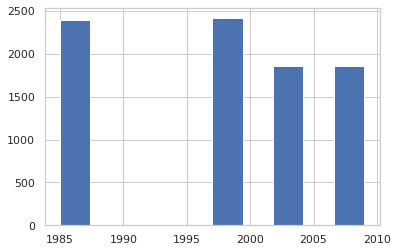

In [87]:
# histograma duración de erupciones con 8 barras
df['Outlet_Establishment_Year'].hist()  #(bins=8) 
# plt.xlabel("Duración en minutos")
# plt.ylabel("Frecuencia")
plt.show()

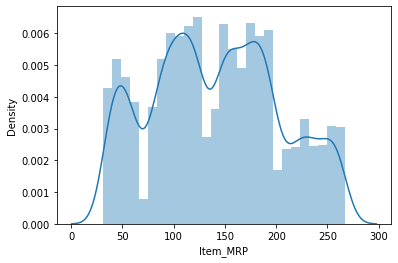

In [81]:
# histogramas
sns.distplot(df['Item_MRP']);